## `Recurrent Neural Networks`
<center><img src="https://miro.medium.com/v2/resize:fit:1194/1*B0q2ZLsUUw31eEImeVf3PQ.png"></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsx
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf


In [2]:
(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)


In [3]:
np.unique(y_train)

array([0, 1])

In [4]:
# Word2index  and  index2word

word2ind = tf.keras.datasets.imdb.get_word_index()

ind2word = {i: w for w, i in word2ind.items()}


In [5]:
def reconstruct(tokens):
    return " ".join([ind2word.get(i - 3, "?") for i in tokens])


reconstruct(X_train[100])

"? i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was ? on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep ? the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the ? box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

In [6]:
max([len(i) for i in X_train])

2494

In [7]:
max_seq_length = 300
embedd_size = 128
vocab_size = 10000
epochs = 50
batch_size = 32


In [8]:
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train , maxlen=max_seq_length , padding='post' , truncating="post" , value=0.0)

X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test , maxlen=max_seq_length , padding='post' , truncating="post" , value=0.0)


In [9]:
X_train_padded.shape

(25000, 300)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size , output_dim=embedd_size , input_length=max_seq_length), # Changed 'input_lenght' to 'input_length'
    tf.keras.layers.SimpleRNN(units=64 , return_sequences=True),
    tf.keras.layers.SimpleRNN(units=32),

    # Top Classifier
    tf.keras.layers.Dense(units=16 , activation="relu"),
    tf.keras.layers.Dense(units=1 , activation="sigmoid")
])

# forc building with dummy input
model.build(input_shape=(None , max_seq_length))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 300, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,296,001 (4.94 MB)

 Trainable params: 1,296,001 (4.94 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    loss="binary_crossentropy" ,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss" , patience=3 , restore_best_weights=True)

history = model.fit(
    X_train_padded , y_train ,
    epochs=epochs ,
    batch_size=batch_size ,
    validation_data=(X_test_padded , y_test) ,
    callbacks=[early_stopping]

)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 54ms/step - accuracy: 0.4971 - loss: 0.7003 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 52ms/step - accuracy: 0.4935 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.5022 - loss: 0.6938 - val_accuracy: 0.5003 - val_loss: 0.6931
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.4988 - loss: 0.6937 - val_accuracy: 0.5008 - val_loss: 0.6934
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5085 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.5108 - loss: 0.6939 - val_accuracy: 0.4995 - val_loss: 0.6933


In [12]:
lest_loss , test_acc = model.evaluate(X_test_padded , y_test)
print(f"Test Loss: {lest_loss}")
print(f"Test Accuracy: {test_acc}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4932 - loss: 0.6931
Test Loss: 0.6931064128875732
Test Accuracy: 0.5002800226211548


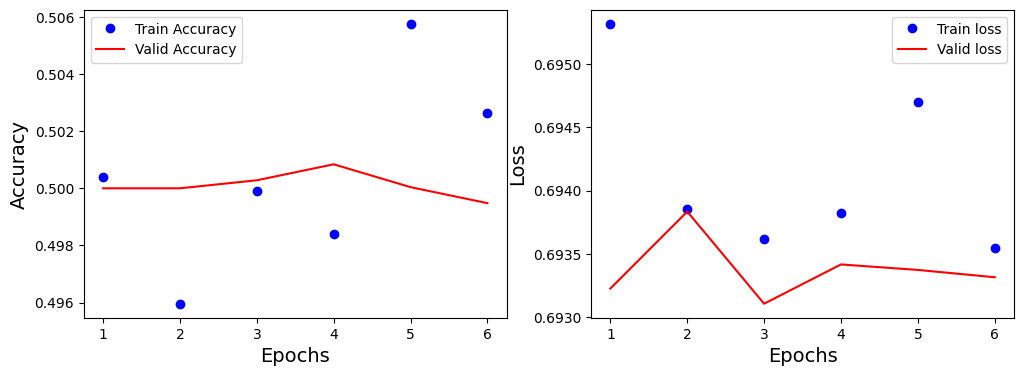

In [14]:
## Visualize the resutls
fia, ax = plt.subplots(1, 2, figsize=(12, 4))
n_epochs = len(history.history['loss'])  # real number of epochs in history, as we made early stopp
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size , output_dim=embedd_size , input_length=max_seq_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True)),  # Added LSTM layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=32)),  # Added LSTM layer

    # Top Classifier
    tf.keras.layers.Dense(units=16 , activation="relu"),
    tf.keras.layers.Dense(units=1 , activation="sigmoid")
])

# forc building with dummy input
model.build(input_shape=(None , max_seq_length))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 300, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,089 (5.42 MB)

 Trainable params: 1,421,089 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.save("model_saveed.keras") # Adding .keras extension to the filename
model = tf.keras.models.load_model("model_saveed.keras") # Adding .keras extension while loading the model as well

In [16]:
from concurrent.futures import process
text = "i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of ? drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was "

def inferance(text : str , clf) :
    encoded_text = [word2ind.get(word , 0) for word in text.split()]

    process = tf.keras.preprocessing.sequence.pad_sequences([encoded_text] ,
                                                            maxlen = max_seq_length ,
                                                            padding = "post" ,
                                                            truncating = "post" ,
                                                            value = 0.0)

    pred = ["Positive" if clf.predict(process)[0][0] >= 0.5 else "Negative"]

    return pred[0]



In [17]:
inferance(text=text , clf=model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'Positive'

In [ ]:
# End